In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


## Plotting with pandas
> We use the standard convention for referencing the matplotlib API ...
> We provide the basics in pandas to easily create decent looking plots. 

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

Let's load the heart attack dataset

In [8]:
data = pd.read_fwf('auto-mpg.data',names =['mpg', 'cylinder', 'displacement', 'horsepower', 'weight', 'acceleration','model year', 'Origin', 'car name' ], na_values='?')

Plotting all columns, works, but does not provide a lot of insight.

<AxesSubplot:>

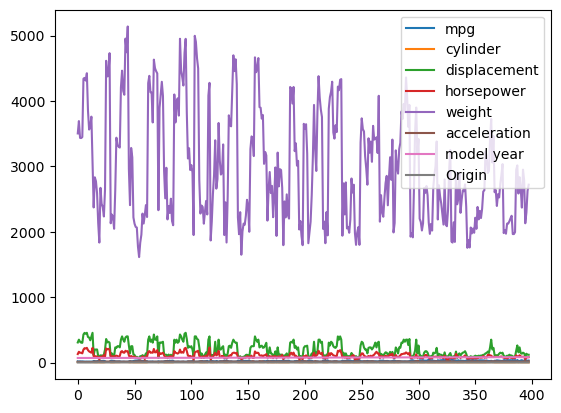

In [9]:
data.plot()

Let's look at the age distribution (a histogram)

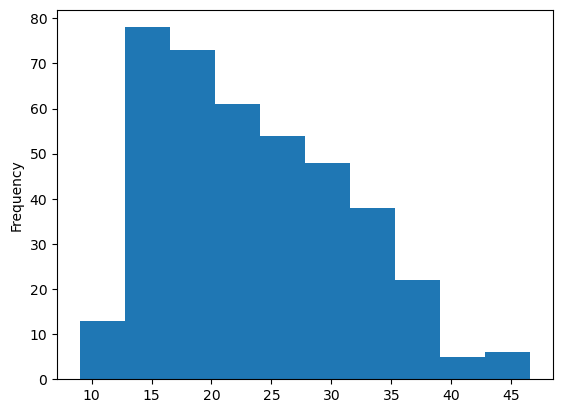

In [10]:
data['mpg'].plot.hist();

How many male and female samples do we have?

In [11]:
data.Origin.value_counts()

1    249
3     79
2     70
Name: Origin, dtype: int64

Notice that we accessed the gender column with dot notation. This can be done whenever the column name is 'nice' enough to be a python variable name.

Do we have similar ages in females and males?  
Plotting two histograms for each gender side beside directly form the dataframe:

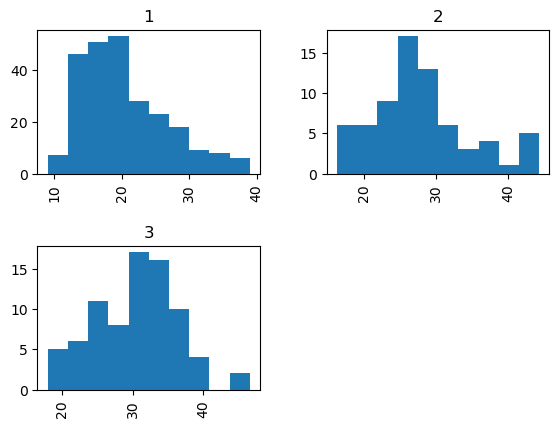

In [12]:
axs = data.hist(column='mpg', by='Origin')

To format this plot, we can work on the axes (array) that is returned by the plot call. We use Matplotlib object oriented interface methods to do this

IndexError: index 2 is out of bounds for axis 0 with size 2

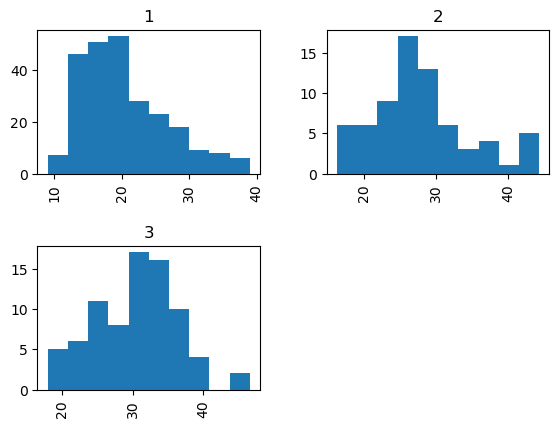

In [13]:
axs = data.hist(column='mpg', by='Origin')
axs[0][0].set(title='1');
axs[0][1].set(title='2');
axs[1][2].set(title='3');


Is age and blood pressure correlated? Maybe it is different for females and males?  
Let's have a look with a scatter plot.

In [ ]:
data.plot.scatter('mpg', 'weight', c='Origin', colormap='winter');

According to:  
https://stackoverflow.com/questions/43578976/pandas-missing-x-tick-labels

the missing x-labels are a pandas bug.

Workaraound is to create axes prior to calling plot

In [ ]:
fig, ax = plt.subplots()
data.plot.scatter('mpg', 'weight', c='Origin', colormap='viridis', ax=ax);

It is a bit annoying that there is a colorbar, we know gender is categorical.

One way to avoid the colorbar is to loop over the categories and assign colors based on the category.

See:
https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib

In [ ]:
colors = {1: 'tab:blue', 2: 'tab:orange', 3: 'tab:pink'}
fig, ax = plt.subplots()
for key, group in data.groupby(by='Origin'):
    group.plot.scatter('mpg', 'weight', c=colors[key], label=key, ax=ax);

## Seaborn 
>Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

http://seaborn.pydata.org/index.html

Seaborn is usually imported as `sns`

In [17]:
import seaborn as sns

Let's re-create the histograms by gender with seaborn with the figure level `displot()` function.

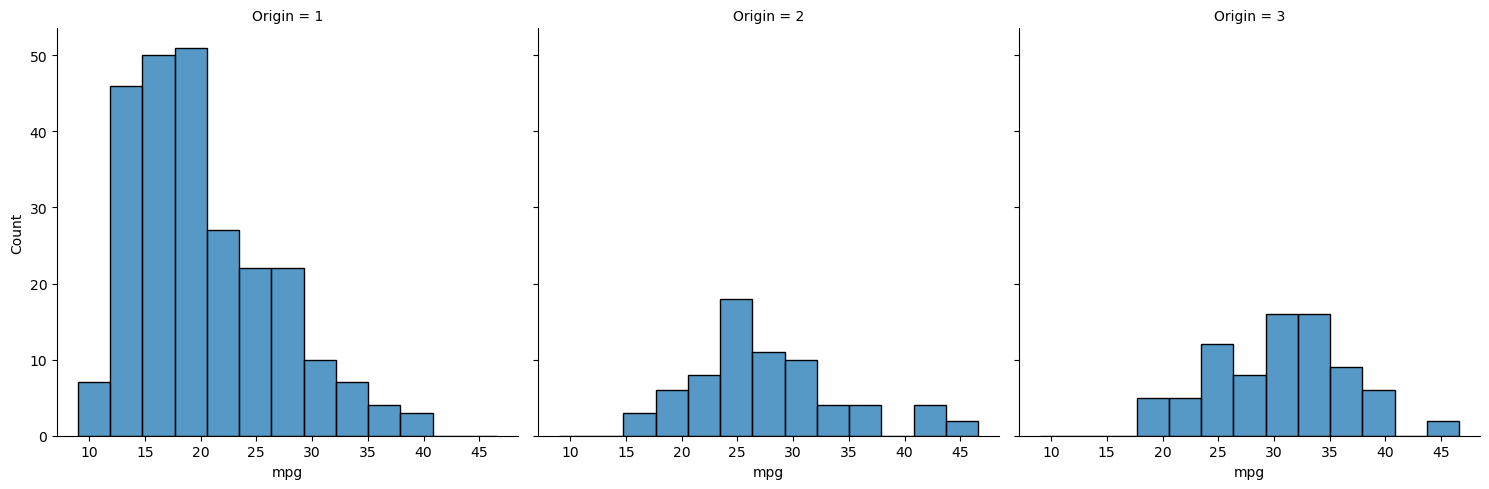

In [19]:
# Use gender to split age into columns
sns.displot(x='mpg', col='Origin', data=data);

We can display the counts in the same plot, one on top of the other.

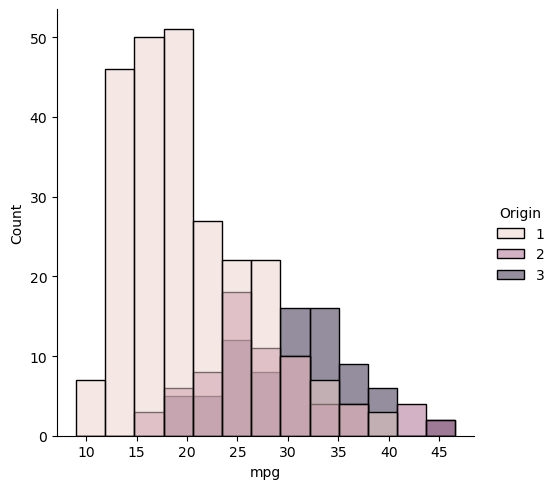

In [20]:
# Use gender to color (hue) in the same plot
sns.displot(x='mpg', hue='Origin', data=data);

To have an idea of the split between male and female, we can stack the counts, adding up to total.

/Users/deleoyelese/opt/anaconda3/envs/ensf-ml/lib/python3.9/site-packages/seaborn/distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


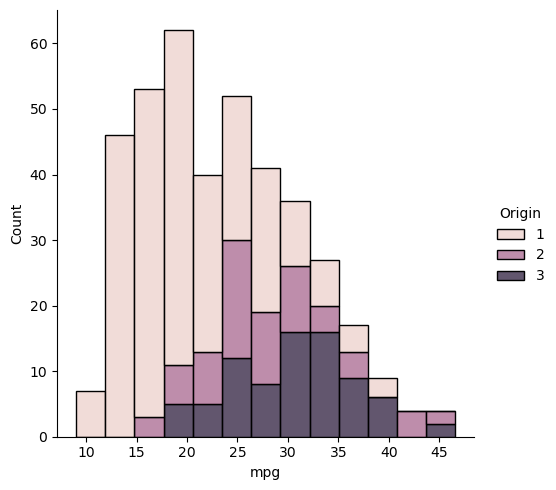

In [21]:
sns.displot(x='mpg', hue='Origin', data=data, multiple='stack');

We can look at the differences in ages with a boxplot too

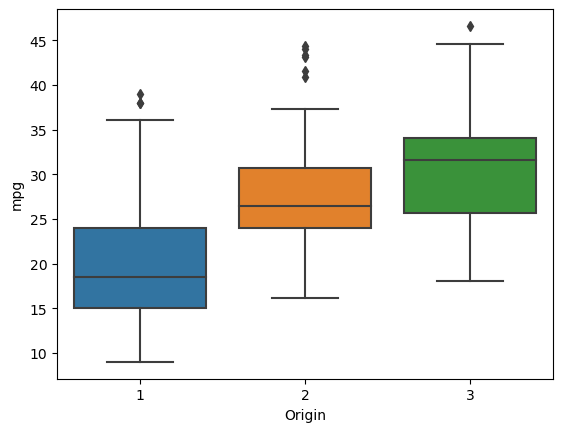

In [22]:
sns.boxplot(x='Origin', y='mpg', data=data);

Let's re-create the scatter plot to see if age and blood pressure are correlated by gender.

To make the legend show strings we will create a gender string column with female and male strings rather than 0 and 1.

In [40]:
data['Origin_str'] = data['Origin'].replace([0, 1, 2], ['0', '1', '2'])

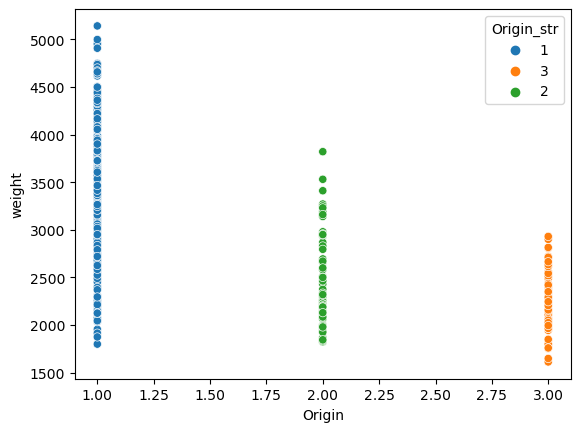

In [41]:
ax = sns.scatterplot(x='Origin', y='weight', data=data, hue='Origin_str')

Adding a regression line helps with visualizing the relationship

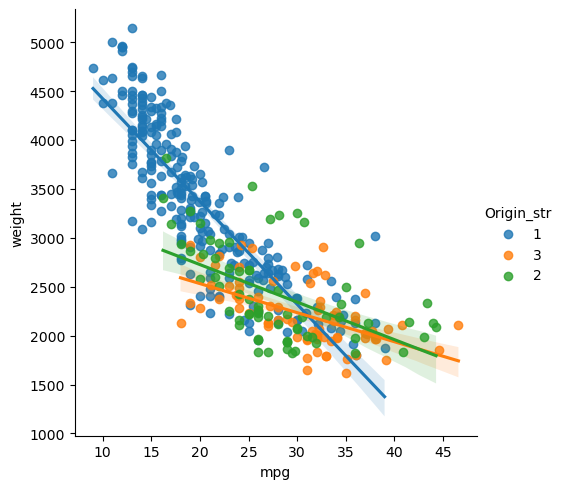

In [42]:
ax = sns.lmplot(x='mpg', y='weight', data=data, hue='Origin_str')

Maybe there are other correlations in the data set. Pairplot is a great way to get an overview

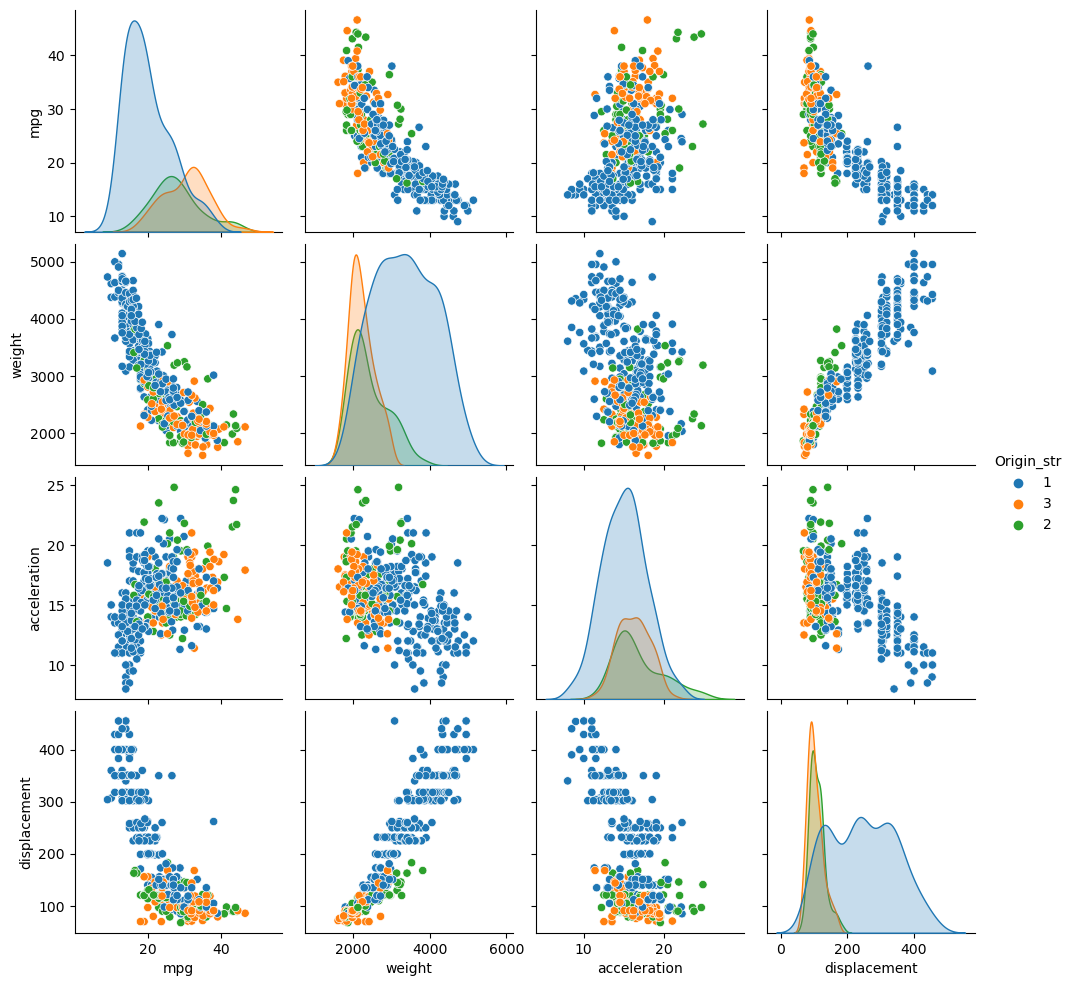

In [43]:
sns.pairplot(data, vars=['mpg', 'weight', 'acceleration', 'displacement'], hue='Origin_str');

As an alternative, we can visualize the correlation matrix as a heatmap

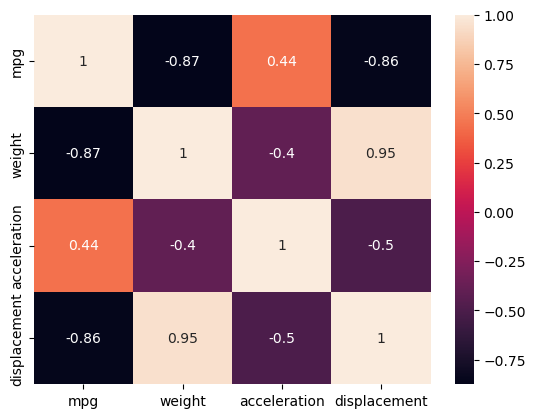

In [44]:
g = sns.heatmap(data[['mpg', 'weight', 'acceleration', 'displacement']].corr(method='spearman'), 
            annot=True)

There are nice tutorials on the Seaborn website, be sure to check these out.